In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [80]:
churn_data = pd.read_csv('/home/julia/IDE/учеба Skillfactory/PY-13_Визуализация данных/data/churn.csv')

In [81]:
# Сделаем обозначения типов клиентов (ушедшие и оставшиеся) более "говорящими"
def define_type(type):
    if type == 0:
        return 'Loyal client'
    else:
        return 'Exited client'

churn_data['client_type'] = churn_data['Exited'].apply(define_type)

In [82]:
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,client_type
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Exited client
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal client
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Exited client
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal client
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal client
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Exited client
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Loyal client
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Exited client
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Loyal client
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Loyal client


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

0    7963
1    2037
Name: Exited, dtype: int64


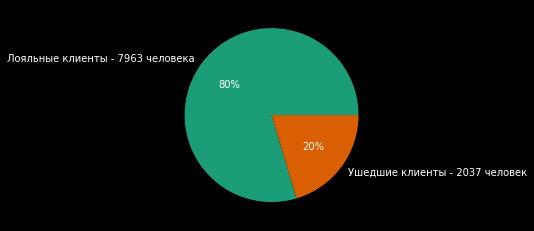

In [83]:
# Готовим данные
pie_exited_data = churn_data['Exited'].value_counts()
print(pie_exited_data)

# Задаем подписи данных и цветовую схему диаграммы 
labels=['Лояльные клиенты - 7963 человека', 'Ушедшие клиенты - 2037 человек']
colors=sns.color_palette('Dark2')[0:5]


# Строим диаграмму
pie_exited = plt.pie(
    pie_exited_data,
    labels=labels,
    colors=colors,
    autopct='%.0f%%'
)

Для отображения доли ушедших клиентов была выбрана круговая диаграмма, как самый простой и наглядный способ показать доли от целого при малом количестве категорий (в нашем случае их всего 2).

Из диаграммы мы видим, что ушедшие клиенты составляют 20% от общего количества клиентов банка. Даже без дополнительного исследования такое число выглядит внушительным. Возможно, с помощью столбчатой диаграммы мы могли бы рассмотреть больше признаков, например, показать цветом, какая доля мужчин и женщин была в числе ушедших и оставшихся клиентов. Давайте попробуем это сделать.

Text(0, 0.5, 'Количество человек')

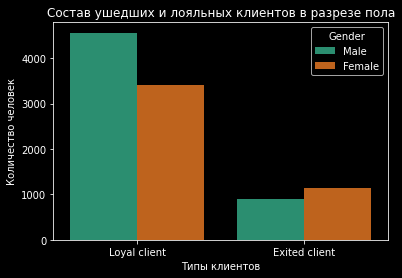

In [84]:
from matplotlib.pyplot import xlabel
import seaborn as sns

# Готовим данные    
count_exited = churn_data[['client_type', 'Gender']].value_counts()
count_exited = pd.DataFrame(count_exited)
count_exited.reset_index(inplace=True)
count_exited.rename(columns={0:'count_of_people'}, inplace=True)

# Задаем переменные
x=count_exited['client_type']
y=count_exited['count_of_people']
hue=count_exited['Gender']

# Создаем стобчатую диаграмму
exited_bar = sns.barplot(x=x, y=y, palette="Dark2", hue=hue)

 # Задаем подписи осей и название диаграммы 
exited_bar.set_title('Состав ушедших и лояльных клиентов в разрезе пола')
exited_bar.set_xlabel('Типы клиентов')
exited_bar.set_ylabel('Количество человек')

Итак, мы видим, что женщины очевидно не так довольны услугами банка как мужчины.
Аналогично можно было бы представить данные об ушедших и оставшихся клиентах в разрезе стран проживания
(Здесь нам даже не придется сокращать количество категорий, ведь с помощью метода nunique() мы можем узнать, что
стран в таблице представлено всего 3).

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [85]:
# Отфильтруем таблицу, оставив только клиентов с балансом выше 2 500 долааров
filtered_balance_data = churn_data[churn_data['Balance'] > 2500]

# Строим диаграмму
balance_hist = px.histogram(
    data_frame=filtered_balance_data,
    x='Balance',
    height=500,
    width=1000,
    title='Распределение денежного баланса клиентов с суммой на счете больше 2500$',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    template='plotly_dark',
    labels={'Balance': 'Баланс на счете клиента'}
)

balance_hist.show()


Для ответа была выбрана гистограмма plotly, так как она позволяет не только оценить распределение в рамках определенного числового признака, но и удобно просмотреть  диапазоны  для каждой категории, которые отображаются при наведении.

Из гистограммы видно, что данные, в основной своей массе, соответствуют нормальному распределению. "Пик" гистограммы находится в диапазоне 122 000 - 124 000. Суммы находящиеся в этом диапазоне клиенты банка хранят на счетах чаще всего. Также мы можем увидеть несколько значений, которые выбиваются из непрерывного распределения гистограммы - их можно рассмотреть поближе на предмет выявления аномалий.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [86]:
# Строим коробчатую диаграмму по распределению баланса на счету в разрезе типа клиента (ушедший или лояльный)
type_balance_box = px.box(
    data_frame=churn_data,
    x='Balance',
    y='client_type',
    height=500,
    width=1000,
    title='Распределение денежного баланса клиентов в зависимости от их типа (ушедшие и лояльные)',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    template='plotly_dark',
    labels={'Balance': 'Баланс на счете клиента', 'client_type': 'Тип клиента'}
)

# Показываем ее
type_balance_box.show()

Сравнение коробчатых диаграмм, построенных для ушедших и оставшихся клиентов, показывает, что распределение для ушедших клиентов заметно "сдвинуто" в сторону бОльших сумм. "Коробка" в случае с ушедшими клиентами лежит в диапазоне между 38 000 и 131 000. Медиана соответствует значению 109 000. При этом для оставшихся клиентов распределение более широкое и "сдвинуто" в сторону меньших сумм - "коробка" лежит в пределах от 0 до 126 000, а медиана составляет всего 92 000.

Иными словами - ушедшие клиенты чаще хранили на своих счетах крупные суммы денег. Таким образом, можно предположить, что такие пользователи ищут выгодные программы обслуживания для клиентов с высоким балансом на счете. Возможно они решили доверить свои деньги банкам, у которых есть vip-предложения для крупных вкладчиков, более высокие проценты по вкладам для данной категории или индивдуальные финансовые косультаты. Возможно также дело в том, что крупные вкладчики ждут более высокого уровня обслуживания, соответствующего своему статусу.

Для предотвращения дальнейшего оттока клиентов возможно стоило бы проинализировать появившиеся в сопоставимый период предложения конкурентов, провести проверку качества собственного обслуживания клиентов, составить программу премиального обслуживания для крупных вкладчиков.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [87]:
# Строим коробчатую диаграмму по распределению возраста в разрезе типа клиента (ушедший или лояльный)
type_age_box = px.box(
    data_frame=churn_data,
    x='Age',
    y='client_type',
    height=500,
    width=1000,
    title='Распределение возраста клиентов в зависимости от их типа (ушедшие и лояльные)',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    template='plotly_dark',
    labels={'Age': 'Возраст клиента', 'client_type': 'Тип клиента'},
    color='client_type'
)
type_age_box.show()

Исходя из коробчатой диаграммы, в группе лояльных клиентов заметно больше потенциальных выбросов, в частности, очень много таких "подозрительных" значений в возрастном диапазоне от 57 до 92.
Распределение ушедших клиентов заметно "сдвинуто" в сторону бОльшего возраста. Исходя из положения "коробки" для данной категории, для предотвращения оттока клиентов банку стоит обратить внимание на возрастную категорию от 38 лет до 51 года - именно в этом диапазоне лежит возраст большинства ушедших пользователей.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

[None]

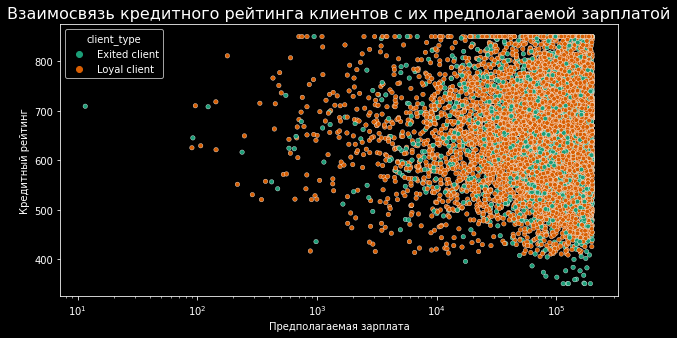

In [88]:
# Задаем размер фигуры
fig = plt.figure(figsize=(10, 5))
hue2 = churn_data['client_type']
# Строим диаграмму рассеяния и окрашиваем маркеры в разные цвета в зависимости от типа клиента
score_to_salary= sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue=hue2,
    s=20,
    palette='Dark2',
)

# Задаем заголовок, названия осей, устанавливаем логарифмическую шкалу по оси абсцисс
score_to_salary.set_title('Взаимосвязь кредитного рейтинга клиентов с их предполагаемой зарплатой', fontsize=16)
score_to_salary.set_xlabel('Предполагаемая зарплата')
score_to_salary.set_ylabel('Кредитный рейтинг')
score_to_salary.set(xscale='log')


Чтобы взаимосвязи между признаками стали более явными, пришлось использовать логарифмическую шкалу по оси абсцисс.
Очевидно, прямой взаимосвязи между уровнем предполагаемой заработной платы на графике не прослеживается - от определенного уровня рейтинга (400) мы налюдаем нечто близкое к нормальному распределению по признаку рейтинга - больше всего клиентов имеют "средний" рейтинг около 600, а ближе к крайним точкам 400 и 800 количество клиентов плавно снижается. Можно предположить, что рейтинг в большей степени зависит от кредитной истории, чем от доходов пользователя.

Мы также можем видеть на графике клиентов с высокой предполагаемой зарплатой и нихким кредитным рейтингом, которые покинули банк. С другой стороны, клиенты, имеющие невысокую зарплату и высокий рейтинг чаще остаются "верными" банку.


#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [89]:
# Готовим данные - группируем их по признаку пола и вычисляем среднее по признаку Exited, тем самым узнаем
# сколько процентов женщин и мужчин (от их общего числа в таблице) покинуло банк
# Также приводим цифры к виду целого числа для красивого отображения данных
exited_grouped = churn_data.groupby(by='Gender', as_index=False)['Exited'].mean()
exited_grouped['Exited']  = exited_grouped['Exited'] * 100
exited_grouped['Exited']  = exited_grouped['Exited'].round()



# Покажем соотношение долей на столбчатой диаграмме, ведь они не составляют вместе 100%
exited_by_gender = px.bar(
    data_frame=exited_grouped,
    x='Gender',
    y='Exited',
    color='Gender',
    text='Exited',
    orientation='v',
    height=500,
    width=1000,
    title='Доля женщин и мужчин, покинувших банк',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    template='plotly_dark',
    labels={'Gender': 'Пол', 'Exited': 'Доля от общего количества в процентах'}
)

exited_by_gender.show()

Воспользовавшись методом из подсказки к выполнению задания, мы подтвердили вывод, который сделали в самом начале - по каким-то причинам женщины покидают банк заметно чаще, чем мужчины

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

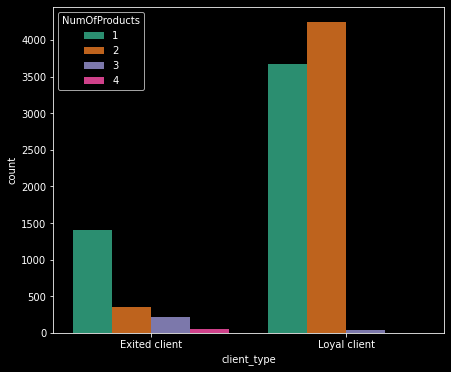

In [96]:
# Готовим данные - сгруппируем клиентов по типу (ушедшие и лояльные) и посчитаем, сколько клиентов из каждой группы
# приобрели 1, 2, 3 или 4 услуги
grouped_products = churn_data.groupby(by='client_type', as_index=False)['NumOfProducts'].value_counts()


# Построим фигуру и многоуровневую столбчатую диаграмму, с разбивкой по количеству приобретенных услуг
# для каждого типа клиентов
fig_products = plt.figure(figsize=(7, 6))

exited_to_products = sns.barplot(
    data=grouped_products,
    x='client_type',
    y='count',
    hue='NumOfProducts',
    palette='Dark2'
)
plt.show()

Хотя ушедших клиентов в абсолютном выражении существенно меньше, чем оставшихся, на многоуровневой столбчатой диаграмме ясно видно, что именно ушедшие клиенты были склонны приобретать больше услуг банка. Например, только в этой группе нашлись клиенты, пользовавшиеся сразу четырьмя услугами.

Напрашивается вывод, что ушедшие клиенты остались недовольны качеством оказанных услуг. Можно предположить, что эта группа более требовательна, но и более открыта к предложениям банка, готова в полной мере использовать предоставляемые банком возможности.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

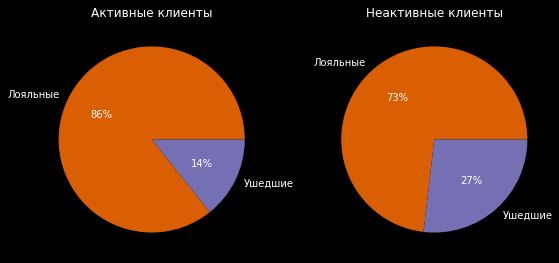

In [91]:
# Для разнообразия, чтобы показать соотношение используем пару круговых диаграмм
# (по одной для группы активных и группы неактивных клиентов).
# Готовим данные - фильтруем таблицу по статусу (Активный/Неактивный клиент),
# вычисляем количество ушедших и оставшихся в каждой категории  
active_client_data = churn_data[churn_data['IsActiveMember']==1]['Exited'].value_counts()
inactive_client_data = churn_data[churn_data['IsActiveMember']==0]['Exited'].value_counts()

# Задаем цветовую палитру, подписи данных, размер фигуры для размещения двуух круговых диаграмм
pie_colors = sns.color_palette('Dark2')[1:5]
pie_labels = ['Лояльные', 'Ушедшие']
plt.figure(figsize=(8,10))

# Для размещения диаграмм "бок о бок" используем функцию subplot
# Строим первую круговую диаграмму
plt.subplot(1, 2, 1)  
plt.pie(active_client_data,labels=pie_labels, colors=pie_colors, autopct='%.0f%%')
plt.title('Активные клиенты')

# Строим вторую круговую диаграмму
plt.subplot(1, 2, 2)
plt.pie(inactive_client_data,labels=pie_labels, colors=pie_colors, autopct='%.0f%%')
plt.title('Неактивные клиенты')

# настраиваем положение диаграмм в фигуре
plt.tight_layout()

# Выводим диаграммы на экран
plt.show()

Для разнообразия (и чтобы не злоупотреблять столбчатыми диаграммами) мы использовали круговые диаграммы, расположенные бок о бок. Из них явно видно, что среди клиентов банка имеющих статус активных, доля ушедших почти в два раза меньше, чем среди неактивных. Очевидно, статус активного клиента дает некие преимущества, которые побуждают клиентов оставаться "верными" банку. А значит, можно предположить, что банк может уменьшить отток среди неактивных клиентов, предложив им получить статус активных.
  

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [92]:
# Готовим данные - группируем по странам и подсчитывааем количество ушедших клиентов
choropleth_exited_data = churn_data[churn_data['Exited']==1]
choropleth_exited_data = choropleth_exited_data.groupby(by='Geography', as_index=False)['Exited'].value_counts()

# Строим график
choropleth_exited = px.choropleth(
    data_frame=choropleth_exited_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой plotly
    color="count", #от чего зависит цвет
    range_color=[0, 1000],
    title='Количество ушедших клиентов в зависимости от страны пребывания', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='thermal', #палитра цветов
)

# Отображаем его
choropleth_exited.show()

На карте видно, что количество ушедших клиентов во Франции и Германии практически равно, при этом количество ушедших клинтов в Испании почти в два раза ниже. Сложно предположить, чем связано такое распределение. Возможно в Испании находится головной офис банка, а значит контроль качества в этой стране строже, а реклама и служба поддержки дял испаноязычных клиентов работают лучше. Возможно во Франции и Германии просто больше клиентов, которые попадают в категорию "крупных вкладчиков", а они, как мы выяснили раньше, чаще склонны покидать банк. Возможно во Франции и Германии хуже работает программа по присвоению статуса "активных клиентов", который, как мы видели на предыдущей диаграмме, предположительно может повышать лояльность клиента банку.
На мой взгляд, чтобы определить истинную причину - стоит провести дополнительные исследования (как минимум - посмотреть как распределились "крупные вкладчики" по странам, в также каково соотношение активных и неактивных клиентов в разных странах)

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

#### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

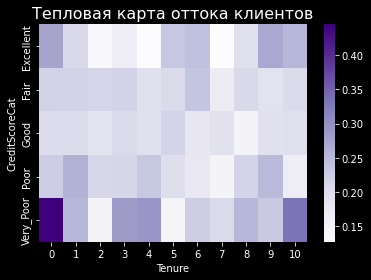

In [93]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Применим функцию к столбцу CreditScoreCat
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Построим сводную таблицу
churn_heatmap_data = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
)

churn_heatmap = sns.heatmap(
    data=churn_heatmap_data,
    cmap='Purples'
)
churn_heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16)

Из тепловой карты видно, что самая "ненадежная категория" - клиенты с самым низким кредитным рейтингом, которые обслуживаются в банке меньше года - именно они чаще всего покидают банк. Также стоит присмотреться к "давним клиентам", которые обслуживаются в банке 10 лет и при этом имеют самый низкий кредитный рейтинг. 

Другие "горячие точки" на карте расположены в зоне самого низкого рейтинга и, парадоксальным образом, - в зоне самого высокого. Например, стоит присмотреться к клинтам из категории Exellent, которые обслуживаются в банке меньше года - многие из них склонны сменить банк, в котором обслуживаются.